In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [2]:
from src.experiments.ease_sweep import run_ease_lambda_sweep

df_results = run_ease_lambda_sweep(
    lambdas=[50, 100, 150, 200, 250, 300, 400, 500, 700, 900, 1000],
    output_csv='ease_lambda_sweep_offline.csv'
)
df_results

[INFO] Running EASE sweep with 11 lambdas...
[INFO] Evaluating lambda = 50 | progress: 0.0 %
[INFO] Evaluating lambda = 100 | progress: 9.09 %
[INFO] Evaluating lambda = 150 | progress: 18.18 %
[INFO] Evaluating lambda = 200 | progress: 27.27 %
[INFO] Evaluating lambda = 250 | progress: 36.36 %
[INFO] Evaluating lambda = 300 | progress: 45.45 %
[INFO] Evaluating lambda = 400 | progress: 54.55 %
[INFO] Evaluating lambda = 500 | progress: 63.64 %
[INFO] Evaluating lambda = 700 | progress: 72.73 %
[INFO] Evaluating lambda = 900 | progress: 81.82 %
[INFO] Evaluating lambda = 1000 | progress: 90.91 %


,ndcg,recall,user_coverage,item_gini,publisher_gini,item_coverage,intra_list_similarity,novelty,lambda
0,0.228595,0.41425,1.0,0.826725,None,0.147920,None,None,50
1,0.231186,0.41950,1.0,0.833186,None,0.138504,None,None,100
2,0.232189,0.42050,1.0,0.838297,None,0.133025,None,None,150
3,0.231603,0.42125,1.0,0.842482,None,0.128403,None,None,200
4,0.231347,0.42050,1.0,0.845208,None,0.124465,None,None,250
5,0.230526,0.42000,1.0,0.847390,None,0.120870,None,None,300
6,0.228727,0.42175,1.0,0.850036,None,0.114706,None,None,400
7,0.226910,0.41850,1.0,0.852571,None,0.110084,None,None,500
8,0.224195,0.41525,1.0,0.856791,None,0.103407,None,None,700
9,0.221582,0.40850,1.0,0.860379,None,0.098784,None,None,900


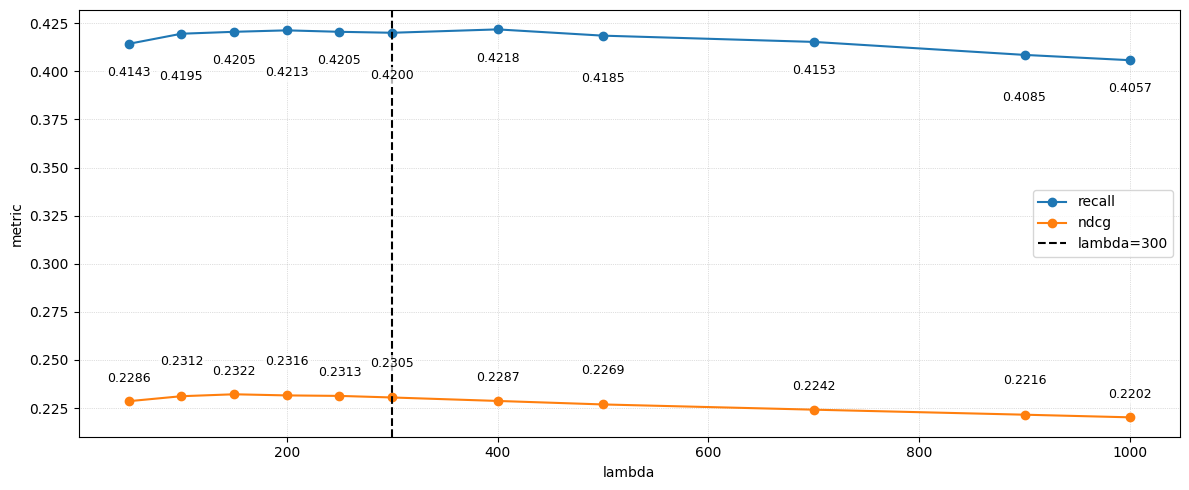

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_results.plot(x="lambda", y="recall", marker="o", ax=ax, label="recall")
df_results.plot(x="lambda", y="ndcg", marker="o", ax=ax, label="ndcg")
# df_results.plot(x="lambda", y="item_gini", marker="o", ax=ax, label="gini")
# df_results.plot(x="lambda", y="item_coverage", marker="o", ax=ax, label="coverage")

ndcg_offsets = [12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12]
recall_offsets = [-16, -26, -16, -26, -16, -26, -16, -26, -16, -26, -16]

for i, (x, y) in enumerate(zip(df_results["lambda"], df_results["ndcg"])):
    ax.annotate(
        f"{y:.4f}",
        (x, y),
        textcoords="offset points",
        xytext=(0, ndcg_offsets[i % len(ndcg_offsets)]),
        ha="center",
        va="bottom",
        fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5),
    )

for i, (x, y) in enumerate(zip(df_results["lambda"], df_results["recall"])):
    ax.annotate(
        f"{y:.4f}",
        (x, y),
        textcoords="offset points",
        xytext=(0, recall_offsets[i % len(recall_offsets)]),
        ha="center",
        va="top",
        fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5),
    )

ax.axvline(300, color="k", linestyle="--", label="lambda=300")
ax.grid(color="gray", linestyle=":", linewidth=0.5, alpha=0.5)
ax.set_xlabel("lambda")
ax.set_ylabel("metric")
ax.legend()

plt.tight_layout()
plt.show()


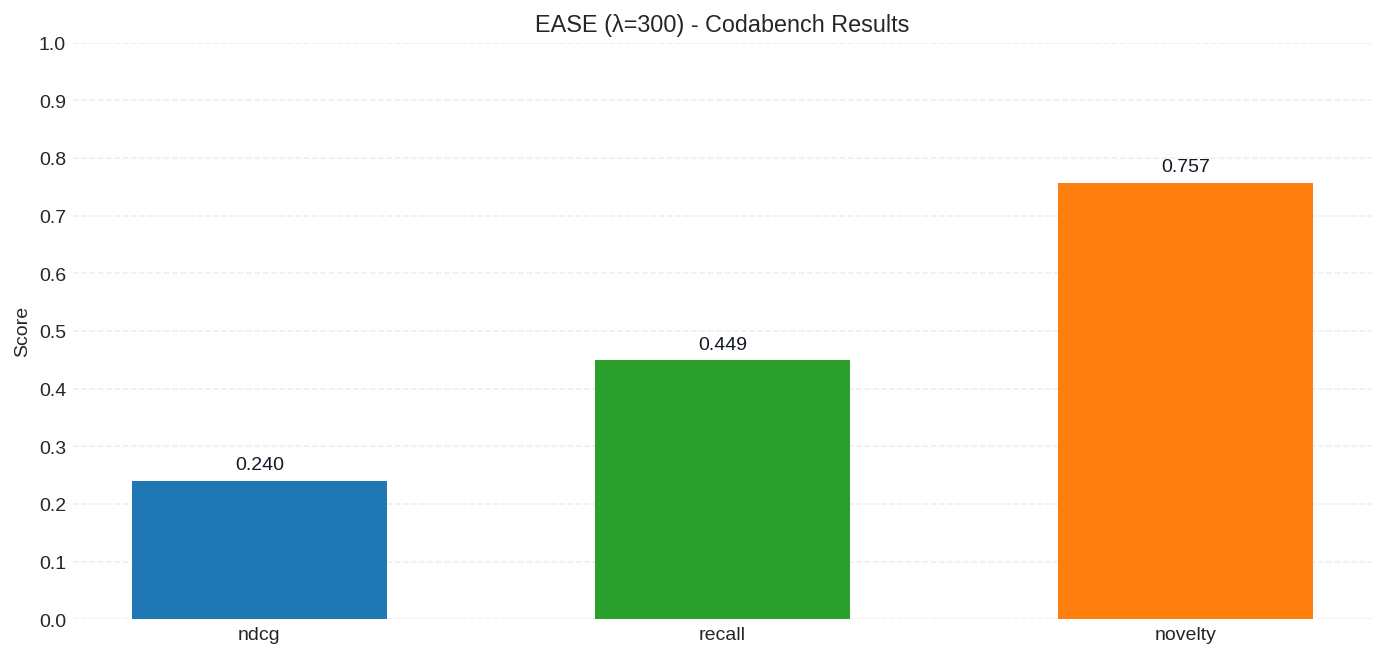

In [81]:
# Codabench results @ λ=300 (baseline for novelty experiments)
focuses = ["ndcg", "recall", "novelty"]
results = {
    "user_coverage": 1.0,
    "item_coverage": 0.18502874574680278,
    "item_gini": 0.8913990480003277,
    "publisher_gini": 0.8936911236896844,
    "recall": 0.4489457657051744,
    "ndcg": 0.24037183269526935,
    "ils": 0.271090624779278,
    "novelty": 0.7571858344680189,
}

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 4.8), dpi=140)

vals = [results[m] for m in focuses]
bars = ax.bar(focuses, vals, color=["C0", "C2", "C1"], width=0.55, edgecolor="none")

ax.set(title="EASE (λ=300) - Codabench Results", ylabel="Score", ylim=(0, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis="y", linestyle="--", linewidth=0.8, alpha=0.35)
ax.grid(axis="x", visible=False)
for s in ax.spines.values():
    s.set_visible(False)

ax.bar_label(bars, labels=[f"{v:.3f}" for v in vals], padding=4, fontsize=10, color="#111827")

plt.tight_layout()
plt.show()


#### Observations
- note: this is based on a subsample of full data (3000 users), this is done for speed. This takes me about 27.33 per iteration, and we tested on 24 lambdas, so it takes about 10 minutes.
- small lambda (0–25): unstable, noise
- medium lambda (100–300): more stable, lower noise
- large lambda (500+): higher item-gini, lower coverage, decreasing ndcg/recall
- best ndcg/recall around lambda=25-150

#### Explanations
- item-gini increase with lambda, because higher lambda values make EASE more popularly biased. Fewer items dominate → gini increases.
- item-coverage decreases with lambda, because EASE favors popular items.

#### Anomalies
- results differ a lot compared to codabench.
    - ndgc: 0.005 vs 0.24
    - recall: 0.008 vs 0.45
- possible reasons:
    - subsampling of users for speed
    - The fold-in / out split is different
        -  codabench uses one holdout per user (likely), we use 80% fold-in-ratio as we did in lecture 2.
## Conclusion
- lambda=25 gives the best recall and best ndgc in this experiment.
- λ=100–300 gives the most stable behavior, good for comparing novelty models later
- I will continue with λ=100.